DESCRIPTION !!

This code implements a Recurrent Neural Network (RNN) using PyTorch to predict the next value in a sine wave time series. The sine wave data is normalized and split into sequences of fixed length for training. A simple RNN model is defined and trained using the Mean Squared Error loss and Adam optimizer over 200 epochs. After training, the model's predictions are compared with actual values, showing high accuracy with a final loss of 0.0002.









Epoch [20/200], Loss: 0.0251
Epoch [40/200], Loss: 0.0047
Epoch [60/200], Loss: 0.0022
Epoch [80/200], Loss: 0.0013
Epoch [100/200], Loss: 0.0010
Epoch [120/200], Loss: 0.0007
Epoch [140/200], Loss: 0.0006
Epoch [160/200], Loss: 0.0004
Epoch [180/200], Loss: 0.0003
Epoch [200/200], Loss: 0.0002


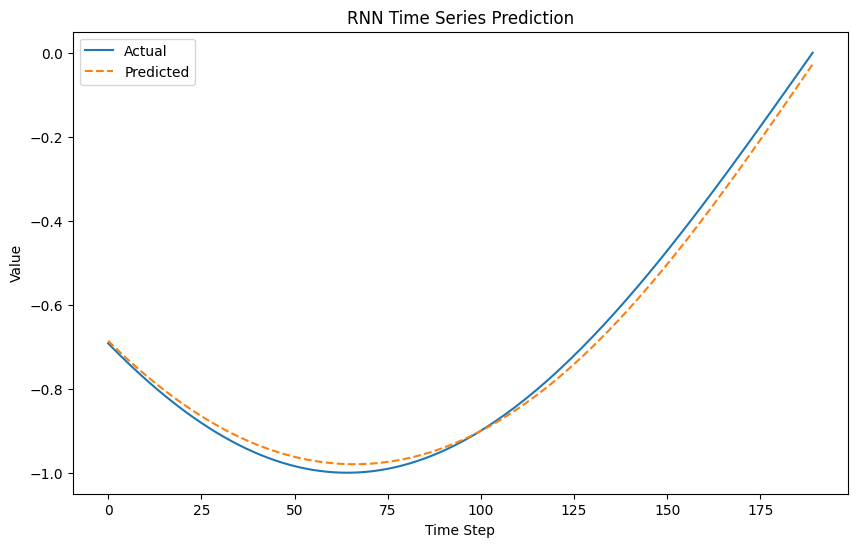

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Generate sample sine wave time series data
def generate_sine_wave(seq_len=1000):
    x = np.linspace(0, 4 * np.pi, seq_len)
    y = np.sin(x)
    return y

# Data preprocessing (normalize the data)
def preprocess_data(data, seq_length=50):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y), scaler

# Define the RNN model
class RNN(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, output_size=1):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])  # Output of the last time step
        return out

# Hyperparameters
seq_length = 50
input_size = 1
hidden_size = 64
output_size = 1
epochs = 200
learning_rate = 0.001

# Generate and preprocess the data
data = generate_sine_wave(1000)
X, y, scaler = preprocess_data(data, seq_length)

# Convert data to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)  # shape: (samples, seq_length, input_size)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(-1)  # shape: (samples, output_size)

# Train-test split
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Initialize the RNN model, loss function, and optimizer
model = RNN(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training the model
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    predictions = model(X_test).detach().numpy()

# Inverse transform predictions and actual values to original scale
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.numpy())

# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted', linestyle='--')
plt.legend()
plt.title('RNN Time Series Prediction')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.show()


The sine wave was chosen as the time series because of its simple, predictable pattern, making it ideal for learning sequence modeling.

MinMaxScaler was used to normalize the data between -1 and 1, which helps in faster and more stable training of the neural network.

The RNN model processes input sequences step-by-step and uses the final hidden state to predict the next time step.

Each input to the RNN is a window of 50 previous values, allowing the model to learn temporal dependencies.

The final output layer (a Linear layer) maps the hidden state to a single value representing the predicted next point.

The loss function (MSE) is appropriate for regression tasks like this where we’re predicting continuous values.

The model achieved a very low final loss (0.0002), which confirms it has successfully learned to predict the sine wave pattern.